In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config; set_config(display="diagram")


![Alt text](image-1.png)

In [184]:
path = "/mnt/c/Users/Nataly/Desktop/Edu Bootcamp/Final Project/heart.csv"

df = pd.read_csv(path)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


![Alt text](image.png)

## Data exploration

In [185]:
df.shape

(918, 12)

In [186]:
df = df.drop_duplicates()
df.shape

(918, 12)

There is not duplicate elements in the dataset

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB


We have 3 types of columns: int64, float64 and object

In [190]:
df.duplicated().sum()


0

In [191]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is no null values in the dataframe. 


In [192]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## Data Preprocessing


In [193]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [194]:
# List of categorical columns
categorical_columns = ["Sex", "ChestPainType" ,"RestingECG" ,"ExerciseAngina" ,"ST_Slope" ]

# Iterate over the categorical columns and display the unique values
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"The unique values in '{column}':")
    for value in unique_values:
        print(f"- {value}")
    print()

The unique values in 'Sex':
- M
- F

The unique values in 'ChestPainType':
- ATA
- NAP
- ASY
- TA

The unique values in 'RestingECG':
- Normal
- ST
- LVH

The unique values in 'ExerciseAngina':
- N
- Y

The unique values in 'ST_Slope':
- Up
- Flat
- Down



In [196]:
# List of numerical columns
num_columns = df.select_dtypes(exclude=['object'])

num_columns.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

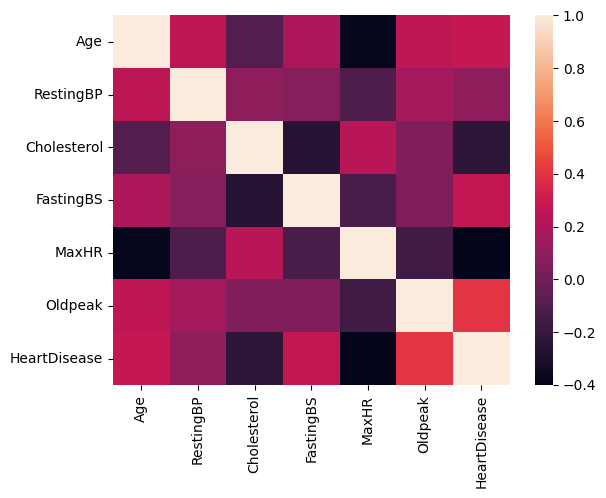

In [197]:
sns.heatmap(num_columns.corr())

There is not necessary to drop a column due to a high correlation

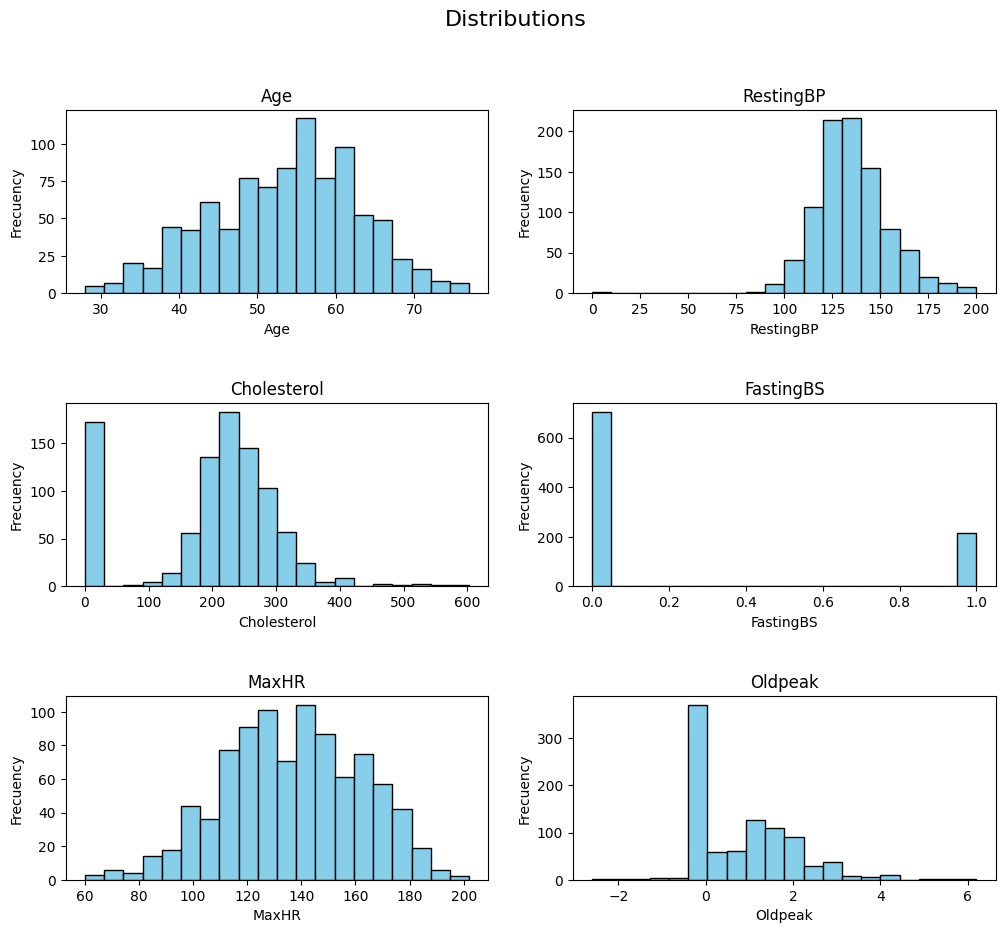

In [198]:
# List of numerical columns
numeric_columns = ["Age",'RestingBP', 'Cholesterol', "FastingBS", "MaxHR", 'Oldpeak', ]

# Subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.6)  # Space between subplots

# Iterate over the columns and create histograms in each subplot
for i, column in enumerate(numeric_columns):
    row = i // 2
    col = i % 2
    df[column].plot(kind='hist', ax=axes[row, col], bins=20, color='skyblue', edgecolor='black')
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frecuency')

# Global title
plt.suptitle('Distributions', fontsize=16)

plt.show()

[]

<Figure size 1500x1000 with 0 Axes>

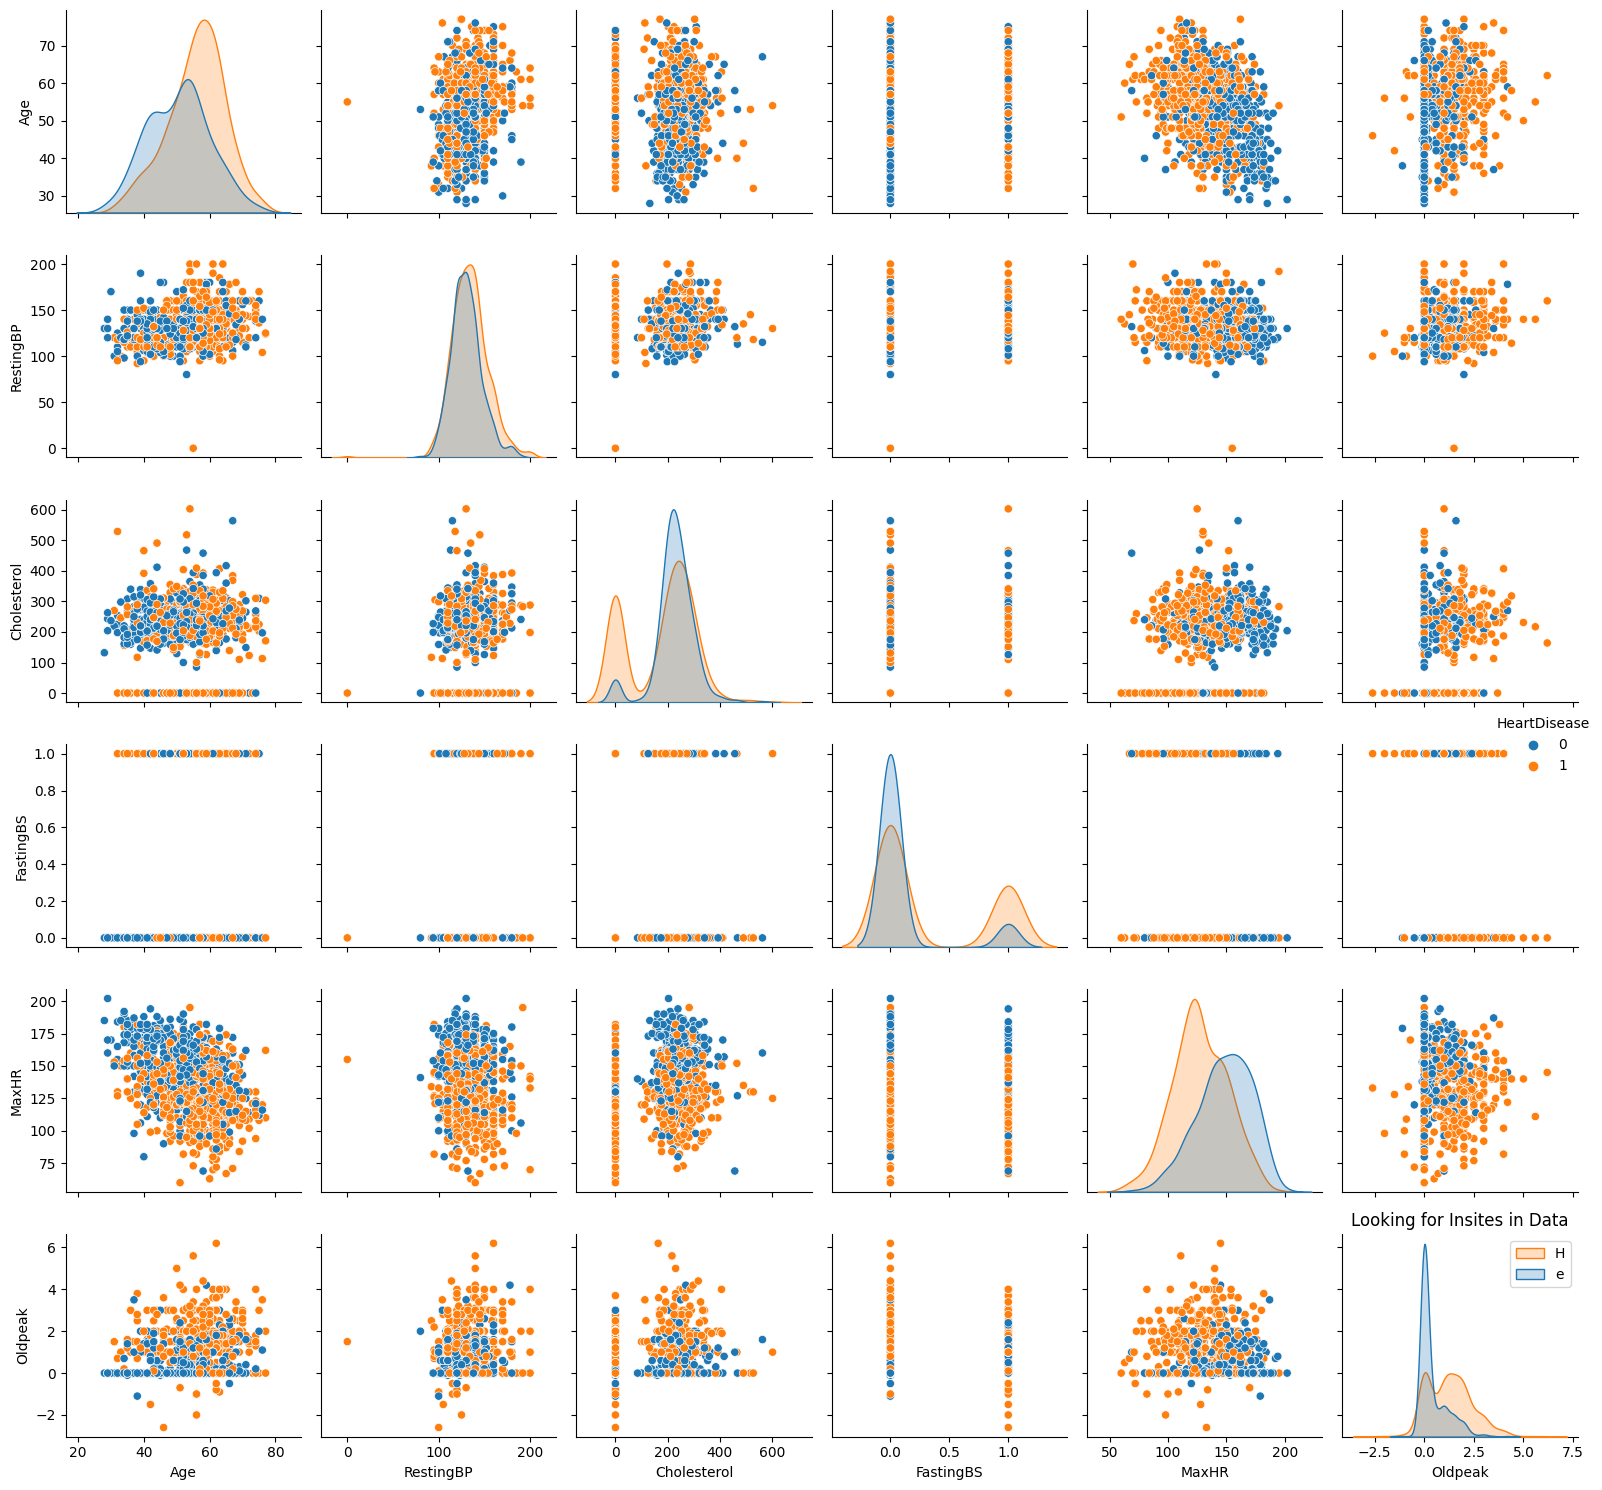

In [199]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

## Pipeline

In [231]:
x = df.drop(columns="HeartDisease")
y = df["HeartDisease"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20)

In [222]:
# Define a pipeline for numerical data
num_transformer = Pipeline([
   ("Robust_Scaler", RobustScaler())
])

# Define a pipeline for categorical data
cat_transformer = Pipeline([
    ("OneHot", OneHotEncoder(drop="if_binary", sparse_output=False))
])

# Parallelize num_transformer and cat_transformer
preprocessor = ColumnTransformer([
    ("num_transformer", num_transformer, numeric_columns),
    ("cat_transformer", cat_transformer, categorical_columns)
], remainder="passthrough")


preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_transformer',
                                 Pipeline(steps=[('Robust_Scaler',
                                                  RobustScaler())]),
                                 ['Age', 'RestingBP', 'Cholesterol',
                                  'FastingBS', 'MaxHR', 'Oldpeak']),
                                ('cat_transformer',
                                 Pipeline(steps=[('OneHot',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'ExerciseAngina', 'ST_Slope'])])

In [223]:
# Fit_transform
X_transformed = preprocessor.fit_transform(x_train)

pd.DataFrame(X_transformed,
             columns=preprocessor.get_feature_names_out()
             ).head()

,num_transformer__Age,num_transformer__RestingBP,num_transformer__Cholesterol,num_transformer__FastingBS,num_transformer__MaxHR,num_transformer__Oldpeak,cat_transformer__Sex_M,cat_transformer__ChestPainType_ASY,cat_transformer__ChestPainType_ATA,cat_transformer__ChestPainType_NAP,cat_transformer__ChestPainType_TA,cat_transformer__RestingECG_LVH,cat_transformer__RestingECG_Normal,cat_transformer__RestingECG_ST,cat_transformer__ExerciseAngina_Y,cat_transformer__ST_Slope_Down,cat_transformer__ST_Slope_Flat,cat_transformer__ST_Slope_Up
0,0.307692,-1.0,-0.261097,0.0,-0.783217,-0.400000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.769231,0.5,0.939948,0.0,-0.139860,-0.266667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.384615,-1.5,0.313316,0.0,1.006993,-0.400000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,-0.5,-2.328982,0.0,0.475524,-0.400000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.076923,0.5,-0.208877,1.0,0.475524,1.666667,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [203]:
X_transformed.shape

(734, 18)

## Cross-Validate the Pipeline

In [233]:
# Define the model
logistic_model = LogisticRegression()

# Build the pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", logistic_model)
])

# Define the scoring metrics as a dictionary
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation and create a DataFrame
cv_results_df = pd.DataFrame(cross_validate(pipeline, x_train, y_train, cv=5, scoring=scoring, return_train_score=True))

# Calculate means and rename columns
mean_cv_results_transposed = cv_results_df.mean().reset_index().rename(columns={'index': 'Metric'})
mean_cv_results_transposed.columns = ['Metric', 'Value']

mean_cv_results_transposed

#If the value for the train is much higher than the test, 
#it means the model tends to overfitting, it is not the case in our model

,Metric,Value
0,fit_time,0.108272
1,score_time,0.070290
2,test_accuracy,0.865148
3,train_accuracy,0.879085
4,test_precision,0.865495
5,train_precision,0.879310
6,test_recall,0.893364
7,train_recall,0.903840
8,test_f1,0.878840
9,train_f1,0.891396
